<a href="https://colab.research.google.com/github/venkatesh-r96/Item-Demand-Forecasting/blob/main/Item_Demand_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set (style = "white" , color_codes = True)
from sklearn.datasets import make_regression
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/FINAL PROJECTS/Demand_Forecasting_train.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
df.shape

(913000, 4)

In [ ]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
 # conver the Date column to datetime format
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


# **Grouping data based on item and Date**

Finding the daily sale of items irrespective of the store

In [ ]:
df = df.groupby(['item','date'],as_index = False)['sales'].agg({'sales':'sum'})
df


,item,date,sales
0,1,2013-01-01,133
1,1,2013-01-02,99
2,1,2013-01-03,127
3,1,2013-01-04,145
4,1,2013-01-05,149
...,...,...,...
91295,50,2017-12-27,511
91296,50,2017-12-28,587
91297,50,2017-12-29,596
91298,50,2017-12-30,612


In [ ]:
duplicateRows = df[df.duplicated()]
duplicateRows

,item,date,sales


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_of_week
df['day_of_year'] = df['date'].dt.day_of_year
df['days_in_month'] = df['date'].dt.days_in_month
df['quarter'] = df['date'].dt.quarter
df['is_leap_year'] = df['date'].dt.is_leap_year
df['is_month_start'] = df['date'].dt.is_month_start
df['is_month_end'] = df['date'].dt.is_month_end
df['is_quarter_start'] = df['date'].dt.is_quarter_start
df['is_quarter_end'] = df['date'].dt.is_quarter_end
df['is_year_start'] = df['date'].dt.is_year_start
df['is_year_end'] = df['date'].dt.is_year_end
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91300 entries, 0 to 91299
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   item              91300 non-null  int64         
 1   date              91300 non-null  datetime64[ns]
 2   sales             91300 non-null  int64         
 3   year              91300 non-null  int64         
 4   month             91300 non-null  int64         
 5   day               91300 non-null  int64         
 6   day_of_week       91300 non-null  int64         
 7   day_of_year       91300 non-null  int64         
 8   days_in_month     91300 non-null  int64         
 9   quarter           91300 non-null  int64         
 10  is_leap_year      91300 non-null  bool          
 11  is_month_start    91300 non-null  bool          
 12  is_month_end      91300 non-null  bool          
 13  is_quarter_start  91300 non-null  bool          
 14  is_quarter_end    9130

Changing the type from bool to int

In [ ]:
cols = list(df.columns)
cols

['item',
 'date',
 'sales',
 'year',
 'month',
 'day',
 'day_of_week',
 'day_of_year',
 'days_in_month',
 'quarter',
 'is_leap_year',
 'is_month_start',
 'is_month_end',
 'is_quarter_start',
 'is_quarter_end',
 'is_year_start',
 'is_year_end']

In [ ]:
for i in cols:
  if df[i].dtype != "datetime64[ns]":
    df[i] = df[i].astype(np.int32)

In [ ]:
#Copying df data to df1
df1 = df.copy()

**Visualize the correlation between the Different elements**

In [ ]:
corrmat = df1.corr()
corrmat

<ipython-input-21-d61d49d5a640>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df1.corr()


,item,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
item,1.000000e+00,-0.063190,-6.211396e-12,-1.021126e-14,4.837608e-16,4.921071e-15,4.901280e-15,5.831464e-14,-8.076171e-15,-8.609498e-16,-4.088658e-16,-2.004056e-16,1.882294e-16,-1.196922e-16,-3.364429e-16,2.165176e-16
sales,-6.318955e-02,1.000000,2.057790e-01,9.864021e-02,3.149728e-03,2.511957e-01,9.743621e-02,5.969536e-02,1.059216e-01,8.525857e-02,-6.489012e-04,3.859767e-04,-9.243344e-04,-6.147004e-03,-3.307881e-02,-2.361358e-02
year,-6.211396e-12,0.205779,1.000000e+00,-5.080291e-04,5.841665e-04,2.711688e-03,6.719189e-04,1.277295e-02,-5.231230e-04,3.538920e-01,-7.138780e-05,-7.138780e-05,-4.075678e-05,-4.075678e-05,-2.029429e-05,-2.029429e-05
month,-1.021126e-14,0.098640,-5.080291e-04,1.000000e+00,1.079604e-02,-1.475063e-03,9.965009e-01,2.360582e-01,9.713853e-01,-1.435549e-03,-1.258675e-03,-1.258675e-03,-3.123419e-02,2.979698e-02,-8.392934e-02,8.321370e-02
day,4.837608e-16,0.003150,5.841665e-04,1.079604e-02,1.000000e+00,7.725204e-04,9.404329e-02,4.573467e-02,1.252828e-02,1.650692e-03,-3.085101e-01,3.080428e-01,-1.761348e-01,1.766654e-01,-8.770396e-02,9.094561e-02
day_of_week,4.921071e-15,0.251196,2.711688e-03,-1.475063e-03,7.725204e-04,1.000000e+00,-1.414220e-03,2.938048e-03,-1.109940e-03,1.641252e-03,2.921641e-03,5.994749e-03,-7.981732e-03,-7.981732e-03,5.198722e-03,1.044050e-02
day_of_year,4.901280e-15,0.097436,6.719189e-04,9.965009e-01,9.404329e-02,-1.414220e-03,1.000000e+00,2.350938e-01,9.682308e-01,1.898655e-03,-2.698399e-02,2.447718e-02,-4.586735e-02,4.426980e-02,-9.051080e-02,9.051058e-02
days_in_month,5.831464e-14,0.059695,1.277295e-02,2.360582e-01,4.573467e-02,2.938048e-03,2.350938e-01,1.000000e+00,2.739340e-01,3.609278e-02,-5.108631e-03,-5.108631e-03,3.848654e-02,5.799833e-03,3.543976e-02,3.543976e-02
quarter,-8.076171e-15,0.105922,-5.231230e-04,9.713853e-01,1.252828e-02,-1.109940e-03,9.682308e-01,2.739340e-01,1.000000e+00,-1.478200e-03,-1.445902e-03,-1.445902e-03,-8.254952e-04,-8.254952e-04,-7.077666e-02,6.995458e-02
is_leap_year,-8.609498e-16,0.085259,3.538920e-01,-1.435549e-03,1.650692e-03,1.641252e-03,1.898655e-03,3.609278e-02,-1.478200e-03,1.000000e+00,-2.017220e-04,-2.017220e-04,-1.151673e-04,-1.151673e-04,-5.734599e-05,-5.734599e-05


<Axes: >

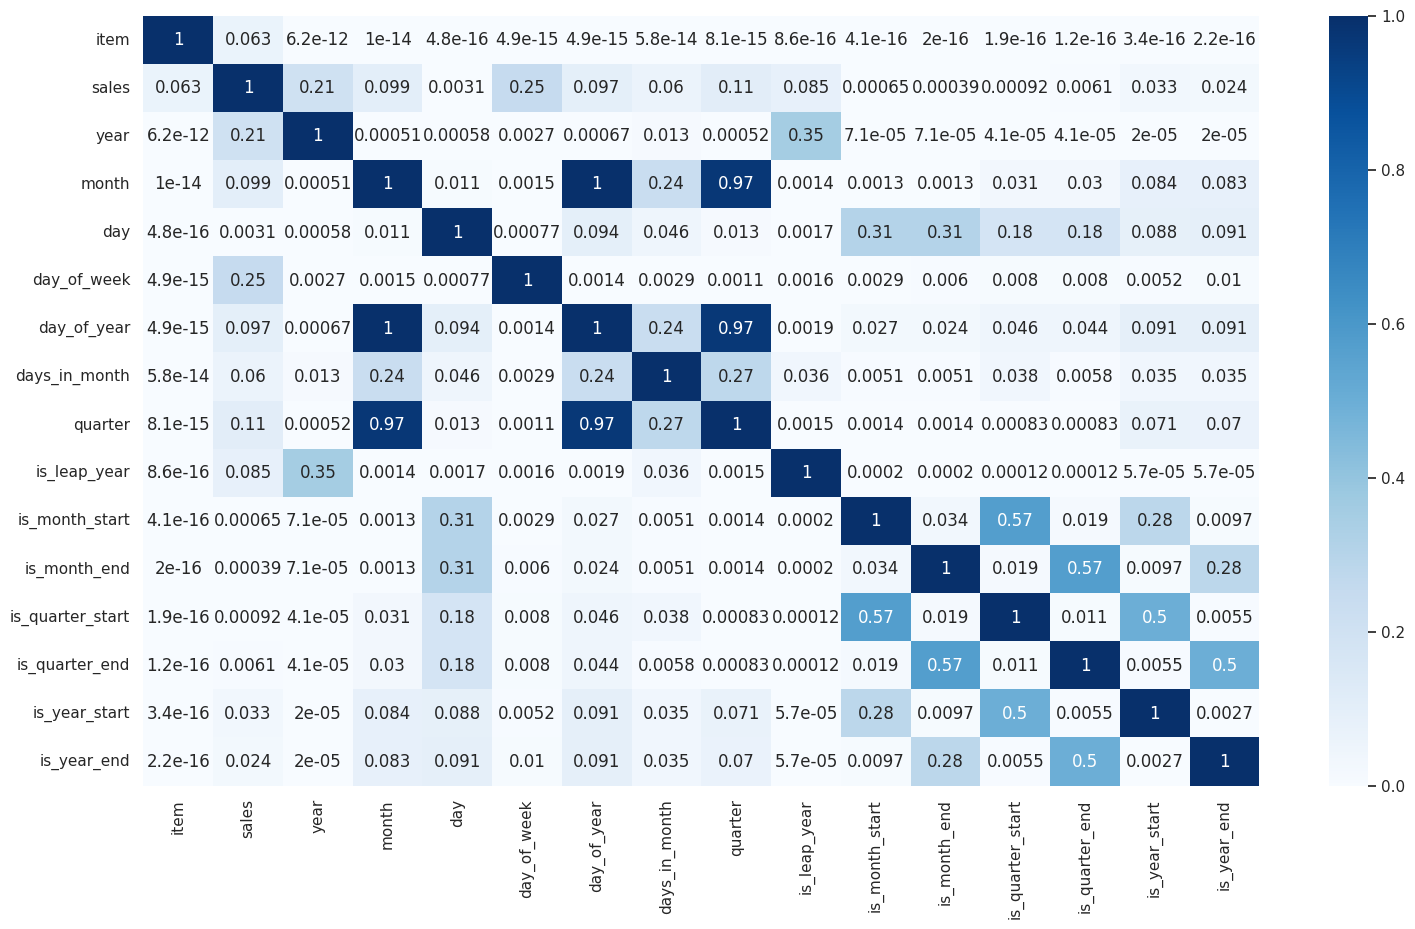

In [ ]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrmat.abs(),annot = True,cmap = "Blues")


# **EXPLORATORY DATA ANALYSIS**

Target column is Sales
EDA on the Dataset with respect to the column

Text(0, 0.5, 'Sales/Item')

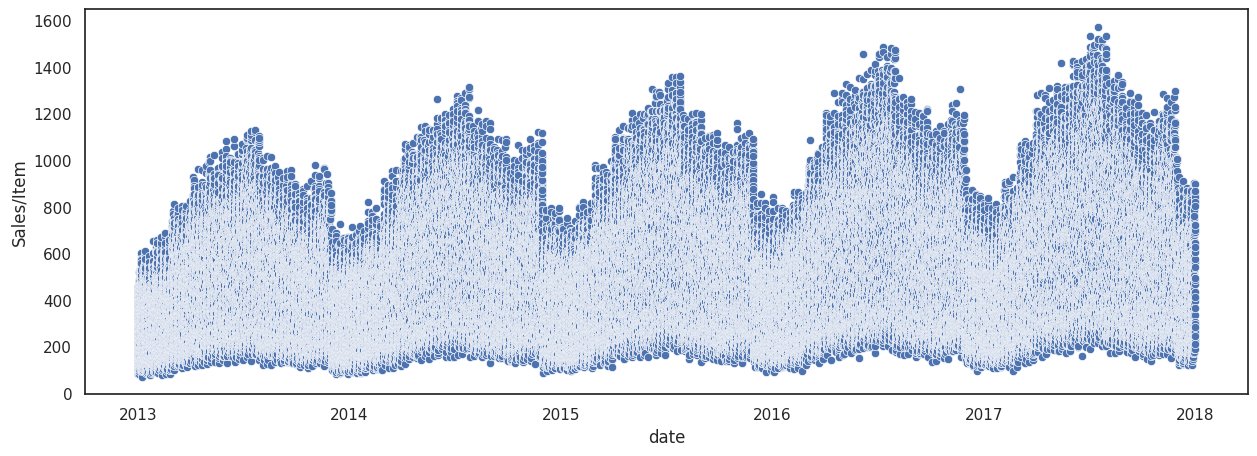

In [ ]:
figure(figsize = (15,5), dpi = 100)
item_daily = df.groupby(["date","item"],as_index = False).agg({'sales':'sum'})
ax_2 = sns.scatterplot(data = item_daily,x = 'date', y = 'sales')
ax_2.set_ylabel('Sales/Item')


**From this graph we can see the data spans from 2013 till the end of 2017**

For Training take data from 2013 till the end of 2016 and for testing take date for 2017. Which gives us a split of 80% for training and 20% for testing

In [ ]:
df1.groupby(['item','date']).mean().reset_index()


,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2013-01-01,133.0,2013.0,1.0,1.0,1.0,1.0,31.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,2013-01-02,99.0,2013.0,1.0,2.0,2.0,2.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2013-01-03,127.0,2013.0,1.0,3.0,3.0,3.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2013-01-04,145.0,2013.0,1.0,4.0,4.0,4.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2013-01-05,149.0,2013.0,1.0,5.0,5.0,5.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91295,50,2017-12-27,511.0,2017.0,12.0,27.0,2.0,361.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91296,50,2017-12-28,587.0,2017.0,12.0,28.0,3.0,362.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91297,50,2017-12-29,596.0,2017.0,12.0,29.0,4.0,363.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91298,50,2017-12-30,612.0,2017.0,12.0,30.0,5.0,364.0,31.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Finding the number of items
num_item = len(df1['item'].unique())
num_item

50

In [ ]:
#Creating the traning data
train_df1 = df1.loc[df1['year'].isin([2013,2014,2015,2016])].reset_index()
train_df1.drop('index',axis = 1, inplace = True)
train_df1

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2013-01-01,133,2013,1,1,1,1,31,1,0,1,0,1,0,1,0
1,1,2013-01-02,99,2013,1,2,2,2,31,1,0,0,0,0,0,0,0
2,1,2013-01-03,127,2013,1,3,3,3,31,1,0,0,0,0,0,0,0
3,1,2013-01-04,145,2013,1,4,4,4,31,1,0,0,0,0,0,0,0
4,1,2013-01-05,149,2013,1,5,5,5,31,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73045,50,2016-12-27,474,2016,12,27,1,362,31,4,1,0,0,0,0,0,0
73046,50,2016-12-28,469,2016,12,28,2,363,31,4,1,0,0,0,0,0,0
73047,50,2016-12-29,566,2016,12,29,3,364,31,4,1,0,0,0,0,0,0
73048,50,2016-12-30,585,2016,12,30,4,365,31,4,1,0,0,0,0,0,0


In [ ]:
# Creating Teat data

test_df1 = df1.loc[df1['year'].isin([2017])].reset_index()
test_df1.drop('index',axis = 1,inplace = True)
test_df1

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2017-01-01,205,2017,1,1,6,1,31,1,0,1,0,1,0,1,0
1,1,2017-01-02,139,2017,1,2,0,2,31,1,0,0,0,0,0,0,0
2,1,2017-01-03,141,2017,1,3,1,3,31,1,0,0,0,0,0,0,0
3,1,2017-01-04,155,2017,1,4,2,4,31,1,0,0,0,0,0,0,0
4,1,2017-01-05,175,2017,1,5,3,5,31,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,50,2017-12-27,511,2017,12,27,2,361,31,4,0,0,0,0,0,0,0
18246,50,2017-12-28,587,2017,12,28,3,362,31,4,0,0,0,0,0,0,0
18247,50,2017-12-29,596,2017,12,29,4,363,31,4,0,0,0,0,0,0,0
18248,50,2017-12-30,612,2017,12,30,5,364,31,4,0,0,0,0,0,0,0


In [ ]:
test_df1['date'] = pd.to_datetime(test_df1['date'])


# Calculating sales for a duration of 3 months (90 Days) for each of the respective days

In [ ]:
for i in range(1,num_item+1,1):
  test_df1.loc[test_df1['item'].isin([i]),'sales_3'] = test_df1.loc[test_df1['item'].isin([i]),'sales'].rolling(90,center = True,min_periods=1).sum().fillna(0)
  train_df1.loc[train_df1['item'].isin([i]),'sales_3'] = train_df1.loc[train_df1['item'].isin([i]),'sales'].rolling(90,center = True,min_periods=1).sum().fillna(0)


**When we observe the given set we can see that sales_3 column has the total sales for 3 months this till 31 march in all items the sales 3 will be zero that each of the month we can see the values because it has crossed the 90day window**.
**sales_3 is our target column now**

In [ ]:
test_df1

,item,date,sales,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,sales_3
0,1,2017-01-01,205,2017,1,1,6,1,31,1,0,1,0,1,0,1,0,7919.0
1,1,2017-01-02,139,2017,1,2,0,2,31,1,0,0,0,0,0,0,0,8104.0
2,1,2017-01-03,141,2017,1,3,1,3,31,1,0,0,0,0,0,0,0,8277.0
3,1,2017-01-04,155,2017,1,4,2,4,31,1,0,0,0,0,0,0,0,8456.0
4,1,2017-01-05,175,2017,1,5,3,5,31,1,0,0,0,0,0,0,0,8658.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,50,2017-12-27,511,2017,12,27,2,361,31,4,0,0,0,0,0,0,0,31899.0
18246,50,2017-12-28,587,2017,12,28,3,362,31,4,0,0,0,0,0,0,0,31002.0
18247,50,2017-12-29,596,2017,12,29,4,363,31,4,0,0,0,0,0,0,0,30365.0
18248,50,2017-12-30,612,2017,12,30,5,364,31,4,0,0,0,0,0,0,0,29664.0


In [ ]:
print(test_df1.isna().sum())
print(train_df1.isna().sum())

item                0
date                0
sales               0
year                0
month               0
day                 0
day_of_week         0
day_of_year         0
days_in_month       0
quarter             0
is_leap_year        0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
sales_3             0
dtype: int64
item                0
date                0
sales               0
year                0
month               0
day                 0
day_of_week         0
day_of_year         0
days_in_month       0
quarter             0
is_leap_year        0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
sales_3             0
dtype: int64


In [ ]:
x_train = train_df1[['item', 'year', 'month', 'day', 'day_of_week','day_of_year', 'days_in_month', 'quarter', 'is_leap_year','is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end','is_year_start', 'is_year_end']]

In [ ]:
y_train = train_df1["sales"]

In [ ]:
x_test = test_df1[['item', 'year', 'month', 'day', 'day_of_week','day_of_year', 'days_in_month', 'quarter', 'is_leap_year','is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end','is_year_start', 'is_year_end']]

In [ ]:
y_test = test_df1["sales"]

In [ ]:
x_test

,item,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2017,1,1,6,1,31,1,0,1,0,1,0,1,0
1,1,2017,1,2,0,2,31,1,0,0,0,0,0,0,0
2,1,2017,1,3,1,3,31,1,0,0,0,0,0,0,0
3,1,2017,1,4,2,4,31,1,0,0,0,0,0,0,0
4,1,2017,1,5,3,5,31,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,50,2017,12,27,2,361,31,4,0,0,0,0,0,0,0
18246,50,2017,12,28,3,362,31,4,0,0,0,0,0,0,0
18247,50,2017,12,29,4,363,31,4,0,0,0,0,0,0,0
18248,50,2017,12,30,5,364,31,4,0,0,0,0,0,0,0


In [ ]:
# train_df1['sales_3'] = train_df1['sales_3'].astype(int)
# test_df1['sales_3'] = test_df1['sales_3'].astype(int)
# df['is_year_end'] = df['is_year_end'].astype(int)
# x_train = pd.DataFrame()
# x_test = pd.DataFrame()
# y_train = pd.DataFrame()
# y_test = pd.DataFrame()
# y_train = train_df1['sales_3']
# y_test = test_df1['sales_3']
# train_df1.drop('date',axis =1, inplace = True)
# test_df1.drop('date',axis =1,inplace = True)
# train_df1.drop('sales_3',axis=1, inplace = True)
# test_df1.drop('sales_3',axis =1,inplace = True)
# train_df1.drop('sales',axis=1, inplace = True)
# test_df1.drop('sales',axis =1,inplace = True)

In [ ]:
# x_train = train_df1.copy()
# x_test = test_df1.copy()


# Linear Regression

The R score is printed to measure the model's effectiveness

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
import sklearn.metrics as metrics
y_pred = regressor.predict(x_test)
r2 = metrics.r2_score(y_test,y_pred)
print(r2)

0.14670257090920225


In [ ]:
HF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
HF

,Actual,Predicted
0,205,550.839989
1,139,351.751683
2,141,382.895657
3,155,414.039631
4,175,445.183605
...,...,...
18245,511,548.142312
18246,587,579.286286
18247,596,610.430259
18248,612,641.574233


# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x1_train = st_x.fit_transform(x_train)
x1_test = st_x.transform(x_test)


In [ ]:
# Fitting Decision tree classifier to the training set
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor(random_state = 0) # HERE RANDOM STATE SHOULD BE 0 ONLY BECAUSE IT IS TIME SERIES DATA
dt_regressor.fit(x1_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# Predicting the test set results
from sklearn.metrics import r2_score
y_pred = dt_regressor.predict(x1_test)
r2  = r2_score(y_test,y_pred)
print(r2)

0.9463144789460513


In [ ]:
x_train

,item,year,month,day,day_of_week,day_of_year,days_in_month,quarter,is_leap_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1,2013,1,1,1,1,31,1,0,1,0,1,0,1,0
1,1,2013,1,2,2,2,31,1,0,0,0,0,0,0,0
2,1,2013,1,3,3,3,31,1,0,0,0,0,0,0,0
3,1,2013,1,4,4,4,31,1,0,0,0,0,0,0,0
4,1,2013,1,5,5,5,31,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73045,50,2016,12,27,1,362,31,4,1,0,0,0,0,0,0
73046,50,2016,12,28,2,363,31,4,1,0,0,0,0,0,0
73047,50,2016,12,29,3,364,31,4,1,0,0,0,0,0,0
73048,50,2016,12,30,4,365,31,4,1,0,0,0,0,0,0


In [ ]:
y_train1 = y_train.values

In [ ]:
y_test1 = y_test.values

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_depth = 4, max_features = 'sqrt')
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
r2_score(predictions, y_test)

-9.182522629302351

In [ ]:
#Saving feature names for later use
original_feature_list = list(x_train.columns) #orginal feature labels

In [ ]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[16]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = original_feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');


In [ ]:
print("The depth of the tree is : ", tree.tree_.max_depth)

The depth of the tree is :  4


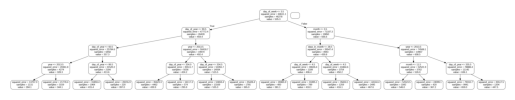

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image from file
image_path = '/content/tree.png'  # Replace with the actual path to your image
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off the axis
plt.show()


**Variable Importance**

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(original_feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: item                 Importance: 0.33
Variable: day_of_year          Importance: 0.18
Variable: month                Importance: 0.15
Variable: day_of_week          Importance: 0.12
Variable: quarter              Importance: 0.12
Variable: year                 Importance: 0.05
Variable: days_in_month        Importance: 0.03
Variable: is_leap_year         Importance: 0.02
Variable: day                  Importance: 0.0
Variable: is_month_start       Importance: 0.0
Variable: is_month_end         Importance: 0.0
Variable: is_quarter_start     Importance: 0.0
Variable: is_quarter_end       Importance: 0.0
Variable: is_year_start        Importance: 0.0
Variable: is_year_end          Importance: 0.0


**New random forest with only the two most important variables**

In [ ]:
rf_most_important = RandomForestRegressor(n_estimators= 100, max_depth = 3, max_features='auto')

# Extract the two most important features
important_indices = ['item','day_of_year']
train_important = x_train.loc[:, important_indices]
test_important = x_test.loc[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

r2_score(predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


-3.345462492828247

NOTE : compare to Voting Classifier Random Forest and XG boost is better approach . Because In Voting Classifier we are training the models with same data set which lead to the Bias values.

# Voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# Scaling is mandatory for Voting Classifier
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x1_train = std.fit_transform(x_train)
x1_test = std.fit_transform(x_test)

In [ ]:
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model3 = KNeighborsClassifier(3)
model = VotingClassifier(estimators = [('lr',model1), ('dt', model2),('knn', model3)], voting= 'soft') # soft means taking the majority rating

model.fit(x1_train,y_train)
preds= model.predict(x1_test)




In [ ]:
model3 = KNeighborsClassifier(3)
model3.fit(x1_train,y_train)
# roc_auc_score(y_test, model3.predict_proba(x1_test)[:,1]) # this is KNN aucroc value


In [ ]:
from sklearn.metrics import f1_score

model3 = KNeighborsClassifier(3)
model3.fit(x1_train, y_train)

# Specify the average parameter based on your needs
f1_score(y_test, model3.predict(x1_test), average='micro')


0.0007671232876712328

In [ ]:
y_test

0        205
1        139
2        141
3        155
4        175
        ... 
18245    511
18246    587
18247    596
18248    612
18249    626
Name: sales, Length: 18250, dtype: int32

In [ ]:
x1_test


array([[-1.69774938,  0.        , -1.60274527, ..., -0.10526316,
        19.07878403, -0.05241424],
       [-1.69774938,  0.        , -1.60274527, ..., -0.10526316,
        -0.05241424, -0.05241424],
       [-1.69774938,  0.        , -1.60274527, ..., -0.10526316,
        -0.05241424, -0.05241424],
       ...,
       [ 1.69774938,  0.        ,  1.58764752, ..., -0.10526316,
        -0.05241424, -0.05241424],
       [ 1.69774938,  0.        ,  1.58764752, ..., -0.10526316,
        -0.05241424, -0.05241424],
       [ 1.69774938,  0.        ,  1.58764752, ...,  9.5       ,
        -0.05241424, 19.07878403]])

In [ ]:
y1_test = np.array(y_test)

In [ ]:
y1_test

array([205, 139, 141, ..., 596, 612, 626], dtype=int32)

In [ ]:
from sklearn.metrics import roc_auc_score

model3 = KNeighborsClassifier(3)
model3.fit(x1_train, y_train)

# Specify the multi_class parameter as 'ovr' or 'ovo' based on your requirements

roc_auc_score(y1_test, model3.predict_proba(x1_test).shape, multi_class='ovr')


AxisError: ignored

# XG Boost

**# Gradient Boosting Algorithm**

In [ ]:
import xgboost as xgb

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Label encoding for y_train1
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train1)

In [ ]:

# # Label encoding for y_train1
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train1)
# y_train_encoded

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

for lr in [0.01,0.05,0.1,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators = 100, verbosity = 0) # Initialize the model
  model.fit(x_train,y_train) # train the model
  model.score(x_test,y_test) # scoring the model - r2 squared
  xgb_regressor= xgb.XGBRegressor()

  print("Learning rate : ", lr, "Train score: ", model.score(x_train,y_train),"Cross-Val score : ", cross_val_score(xgb_regressor,x_train,y_train, cv=5))


Learning rate :  0.01 Train score:  -0.14758494838486014 Cross-Val score :  [-0.65946152  0.56435338  0.14928586 -0.68831327 -0.27541112]
Learning rate :  0.05 Train score:  0.8509473610461777 Cross-Val score :  [-0.65946152  0.56435338  0.14928586 -0.68831327 -0.27541112]
Learning rate :  0.1 Train score:  0.9653971866387364 Cross-Val score :  [-0.65946152  0.56435338  0.14928586 -0.68831327 -0.27541112]
Learning rate :  0.15 Train score:  0.9838453871310461 Cross-Val score :  [-0.65946152  0.56435338  0.14928586 -0.68831327 -0.27541112]
Learning rate :  0.2 Train score:  0.9867190618227848 Cross-Val score :  [-0.65946152  0.56435338  0.14928586 -0.68831327 -0.27541112]
Learning rate :  0.5 Train score:  0.9903414585249238 Cross-Val score :  [-0.65946152  0.56435338  0.14928586 -0.68831327 -0.27541112]
Learning rate :  0.7 Train score:  0.990094514347379 Cross-Val score :  [-0.65946152  0.56435338  0.14928586 -0.68831327 -0.27541112]
Learning rate :  1 Train score:  0.9893629434870075

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators= 100)
model.fit(x_train,y_train) # train the model
model.score(x_test, y_test) # scoring

0.9812482190933502

# Interpretation

**From the all ML model XG Boost gives the higher prediction accuracy 0.98.**